In [1]:
# 1. We had to downsample road points and gather a lot of person point clouds so that both are in the range of 20k.
# 2. We need to visualize the distribution of the features after loading then and then perform ML

In [1]:
import pandas as pd

df_road = pd.read_csv("csv/road_features_sur_pla_sph_knn50.csv")
df_road.head()

,surface_variation,planarity,sphericity
0,0.006218,0.188079,0.004025
1,0.006507,0.173624,0.004163
2,0.006796,0.170091,0.004335
3,0.007224,0.152919,0.004544
4,0.011884,0.791808,0.011456


In [2]:
df_road.describe()

,surface_variation,planarity,sphericity
count,2.306700e+04,23067.000000,2.306700e+04
mean,5.004602e-02,0.754360,4.581783e-02
std,1.460075e-01,0.203106,1.339426e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,5.160265e-12,0.670506,5.357502e-12
50%,1.610822e-11,0.817463,1.598321e-11
75%,9.954130e-10,0.900280,9.470987e-10
max,1.000000e+00,1.000000,1.000000e+00


In [3]:
df_road.dtypes

surface_variation    float64
planarity            float64
sphericity           float64
dtype: object

In [4]:
import numpy as np
def get_bin_size_for_histogram(_data):
    """
    Bin calculated using Freedman-Diaconis rule for the histogram plot
    """
    iqr = np.percentile(_data, 75) - np.percentile(_data, 25)
    bin_width = 2 * iqr / np.power(len(_data), 1/3)
    num_bins = int((np.max(_data) - np.min(_data)) / bin_width)
    return num_bins

In [44]:
import seaborn as sns

def display_hist_from_seaborn(feature_array):
    try:
        number_of_bins = get_bin_size_for_histogram(feature_array)
        sns.displot(feature_array, bins=number_of_bins, kde=True)
    except Exception as e:
        print(f"Exception Occured,{e}, plot may not be consistent")
        sns.displot(feature_array, bins=50,  kde=True,)

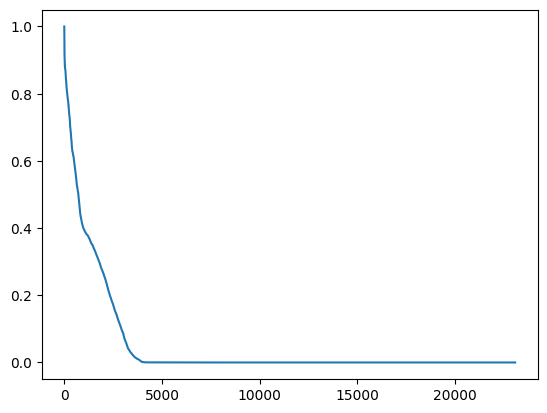

In [17]:
surf_var = df_road["surface_variation"].sort_values(ascending=False).to_numpy()

import matplotlib.pyplot as plt

plt.plot(surf_var)

In [10]:
df_road.iloc[:, 0].to_numpy().shape

(23067,)

Exception Occured,Unable to allocate 107. GiB for an array with shape (14373228706,) and data type float64, plot may not be consistent


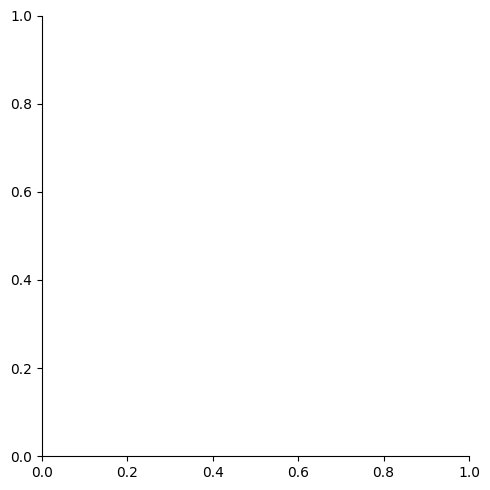

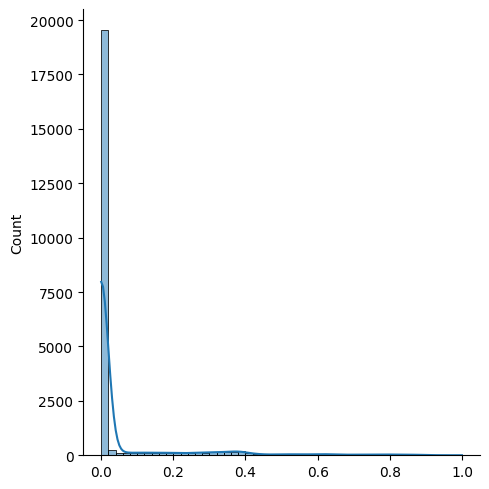

In [43]:
display_hist_from_seaborn(surf_var) # plot for surface variation

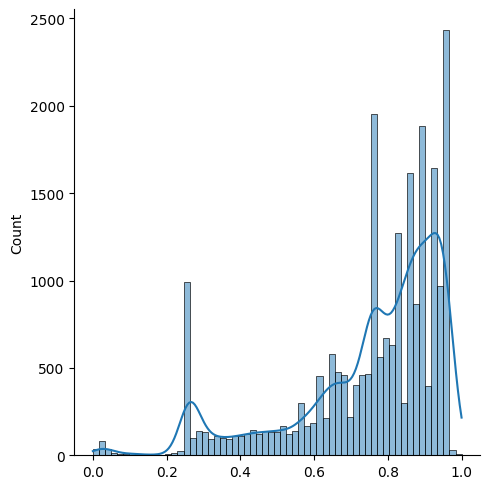

In [46]:
display_hist_from_seaborn(df_road.iloc[:, 1].to_numpy()) # plot for planarity

Exception Occured,Unable to allocate 113. GiB for an array with shape (15113630347,) and data type float64, plot may not be consistent


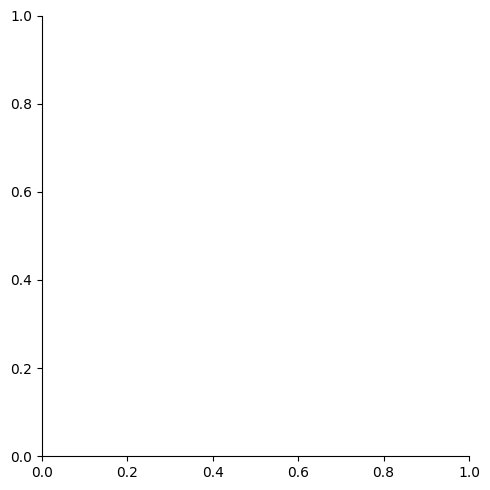

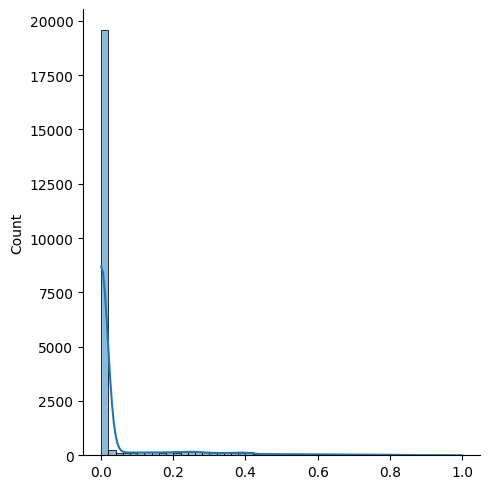

In [47]:
display_hist_from_seaborn(df_road.iloc[:, 2].to_numpy()) # Plot for sphericity

## Visualizing the persons features

In [48]:
filename = "csv/person_features_sur_pla_sph_knn50.csv"
df_person = pd.read_csv(filename)
df_person

,surface_variation,planarity,sphericity
0,0.740150,0.148927,0.713221
1,0.752240,0.213562,0.760365
2,0.929919,0.259741,1.000000
3,0.916919,0.276420,0.994364
4,0.753820,0.130892,0.718931
...,...,...,...
21460,0.448711,0.109482,0.299997
21461,0.343518,0.122040,0.220663
21462,0.438465,0.127920,0.297716
21463,0.448711,0.109482,0.299997


#### visualizing surface variation of person

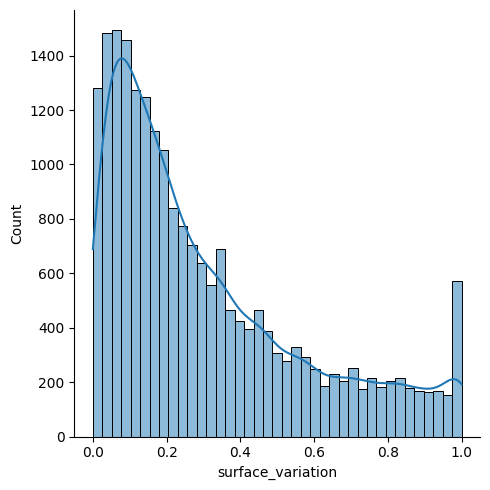

In [49]:
display_hist_from_seaborn(df_person["surface_variation"]) # plot for surface variation

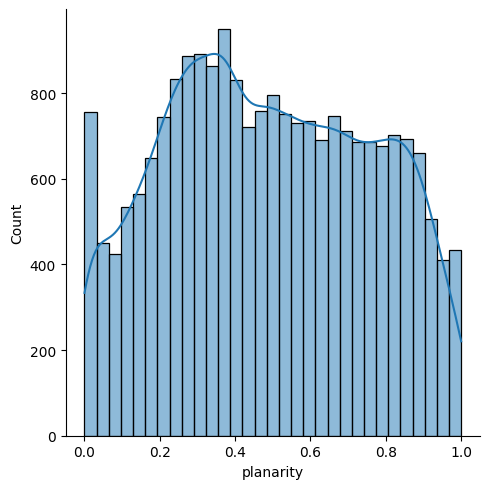

In [50]:
display_hist_from_seaborn(df_person["planarity"]) # plot for planarity

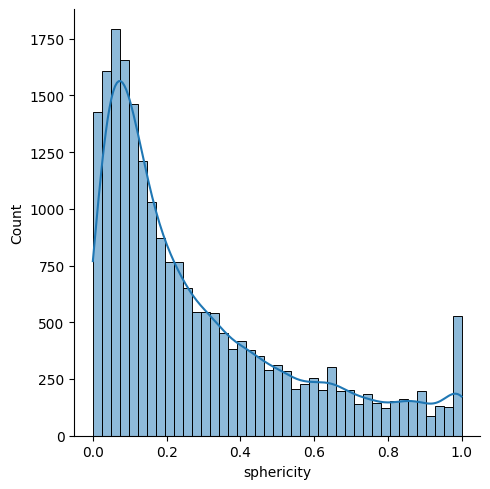

In [51]:
display_hist_from_seaborn(df_person["sphericity"]) # plot for sphericity

In [52]:
df_road["label"] = 0

In [53]:

df_road

,surface_variation,planarity,sphericity,label
0,0.006218,0.188079,0.004025,0
1,0.006507,0.173624,0.004163,0
2,0.006796,0.170091,0.004335,0
3,0.007224,0.152919,0.004544,0
4,0.011884,0.791808,0.011456,0
...,...,...,...,...
23062,0.758502,0.446718,0.635685,0
23063,0.764551,0.446809,0.641157,0
23064,0.766176,0.448048,0.643151,0
23065,0.781383,0.415994,0.642782,0


In [54]:
df_person["label"] = 1
df_person

,surface_variation,planarity,sphericity,label
0,0.740150,0.148927,0.713221,1
1,0.752240,0.213562,0.760365,1
2,0.929919,0.259741,1.000000,1
3,0.916919,0.276420,0.994364,1
4,0.753820,0.130892,0.718931,1
...,...,...,...,...
21460,0.448711,0.109482,0.299997,1
21461,0.343518,0.122040,0.220663,1
21462,0.438465,0.127920,0.297716,1
21463,0.448711,0.109482,0.299997,1


In [59]:
df_combined = pd.concat([df_person, df_road], axis=0).sample(frac=1).reset_index(drop=True) # concat, shuffle and reset index
df_combined

df_combined.to_csv("csv/combined_person_road_features_knn50.csv", index=False)

In [60]:
df_combined = pd.read_csv("csv/combined_person_road_features_knn50.csv")
df_combined

,surface_variation,planarity,sphericity,label
0,3.665382e-04,0.874493,3.688341e-04,0
1,6.273379e-02,0.270042,4.039831e-02,1
2,2.393545e-11,0.754787,2.352704e-11,0
3,4.264701e-01,0.586308,4.353467e-01,1
4,8.260216e-01,0.005114,6.131410e-01,1
...,...,...,...,...
44527,1.211691e-01,0.250662,7.335797e-02,1
44528,2.129636e-11,0.900302,2.176973e-11,0
44529,2.306645e-11,0.956368,2.390908e-11,0
44530,1.383493e-01,0.726224,1.230969e-01,1


# Applying ML to see how the data are performing

Validation Accuracy: 80.66%
Test Accuracy: 80.47%


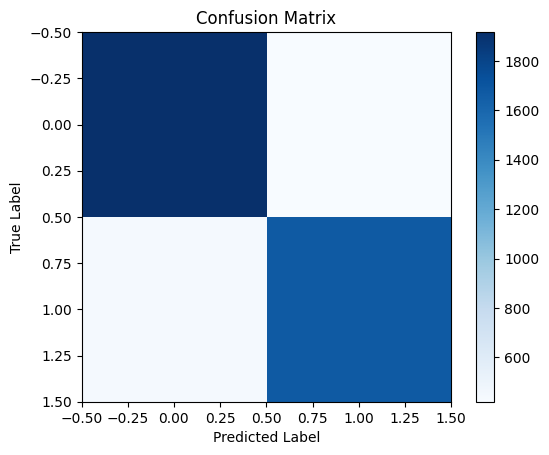

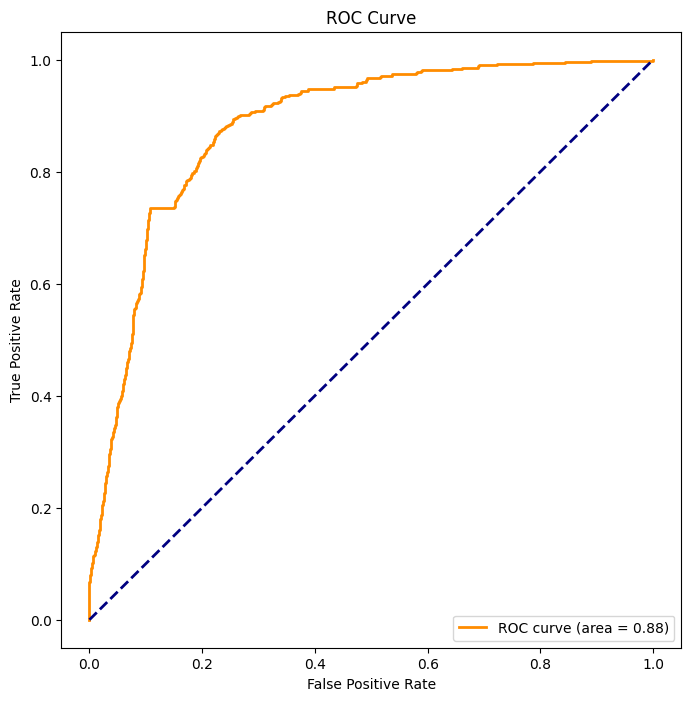

In [73]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your data is in a NumPy array with shape (40000, 3)
# Replace X_data and y_data with your actual feature matrix and target variable
# X_data should be a 2D array with shape (40000, 3)
# y_data should be a 1D array with shape (40000,)
# If you have a different structure, adjust accordingly

# Generate some example data (replace this with your actual data)
np.random.seed(42)
X_data = df_combined.iloc[:, :3]
y_data = df_combined.iloc[:, 3]

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = classifier.predict(X_val)

# Calculate and print the accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val:.2%}")

# Make predictions on the validation data
y_test_pred = classifier.predict(X_test)

# Calculate and print the accuracy on the validation set
accuracy_val = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_val:.2%}")

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, classifier.decision_function(X_val))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [74]:
# saving the model
import pickle

filename = f"trained_model/svm_linear_classifier.pkl"
with open(filename, 'wb') as handle:
    pickle.dump(classifier, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [75]:

with open(filename, 'rb') as handle:
    classifier_model = pickle.load(handle)

In [76]:
# Make predictions on the validation data
y_check_pred = classifier_model.predict(X_val)

# Calculate and print the accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_check_pred)
print(f"Loaded Model Accuracy: {accuracy_val:.2%}")

Loaded Model Accuracy: 80.66%


### Using the Trained Model to predict on new data


In [78]:
df_new = pd.read_csv("/home/nero/Documents/segmented_road_with_person_to_test.csv")
df_new.head()

,//X,Y,Z,ObjIdx,ObjTag
0,-3.661836,10.564414,0.390450,0.0,2.0
1,-3.596035,10.582603,0.390304,0.0,2.0
2,-2.449121,7.664546,0.280984,0.0,5.0
3,-2.407285,7.695078,0.281560,0.0,5.0
4,-0.934102,11.121582,0.389741,0.0,2.0


In [79]:
df_new["ObjTag"].unique()

array([ 2.,  5., 18.,  8.,  7.,  4., 17.,  0.])

In [82]:
df_new.iloc[13763]

//X         4.133008
Y           3.731294
Z          -1.449408
ObjIdx    580.000000
ObjTag      4.000000
Name: 13763, dtype: float64

In [84]:
df_new.iloc[5458]

//X       -3.960469
Y        -11.425791
Z         -2.298475
ObjIdx     0.000000
ObjTag     8.000000
Name: 5458, dtype: float64

## So ObjTag 4 and ObjIdx 580 is for Person (using pointlist picking to get the index from cloudcompare and getting the corresponding value from datafram)
## ObjIdx 0 is for non-movable object and  ObjTag 7 & 8 is the semantic label for road

###  Need to do point list picking in cloudcompare to find the corresponding index to get the ObjTag of person or road or other objects

In [89]:
df_person_and_road = df_new[df_new["ObjTag"].isin([4, 7, 8])] 

In [94]:
df_person_and_road["ObjTag"][df_person_and_road["ObjTag"] == 8] = 0

/home/nero/Projects/spawn_pedestrian_carla/env/lib/python3.8/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [95]:
df_person_and_road["ObjTag"][df_person_and_road["ObjTag"] == 7] = 0

/home/nero/Projects/spawn_pedestrian_carla/env/lib/python3.8/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [96]:
df_person_and_road["ObjTag"][df_person_and_road["ObjTag"] == 4] = 1

/home/nero/Projects/spawn_pedestrian_carla/env/lib/python3.8/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [98]:
df_person_and_road["ObjTag"].unique()

array([0., 1.])

### 0 represents road, 1 represents person

In [99]:
df_person_and_road

,//X,Y,Z,ObjIdx,ObjTag
316,13.244883,-30.487314,-2.298460,0.0,0.0
317,13.058827,-30.567465,-2.298460,0.0,0.0
318,12.872343,-30.646477,-2.298460,0.0,0.0
319,12.685312,-30.724356,-2.298460,0.0,0.0
320,12.497812,-30.801088,-2.298460,0.0,0.0
...,...,...,...,...,...
23217,6.670547,-2.300796,-2.349909,0.0,0.0
23218,6.654882,-2.340845,-2.349350,0.0,0.0
23219,6.639102,-2.380889,-2.348879,0.0,0.0
23220,6.623398,-2.420908,-2.348494,0.0,0.0


## finding features for testing

In [118]:
df_person_and_road = df_person_and_road.reset_index(drop=True) # Before proceeding need to reset index so no complexity arises when concating later

In [121]:
import pickle
from surface_variation import PointCloudAnalysis
import open3d as o3d
import pandas as pd


kdtreeseachknn = o3d.geometry.KDTreeSearchParamKNN(50) # 50 Nearest Neighbour to calculate covariance matrix

df_feature_with_label = pd.DataFrame(columns=["surface_variation","planarity","sphericity","label",])
pcd = PointCloudAnalysis(df_person_and_road.iloc[:, :3].to_numpy(), kdtreeseachknn)
df_feature_with_label["surface_variation"] = pd.Series(pcd.get_normalized_surface_variation())
df_feature_with_label["planarity"] = pd.Series(pcd.get_normalized_planarity(), )
df_feature_with_label["sphericity"]  = pd.Series(pcd.get_normalized_sphericity(), )
df_feature_with_label["label"] = pd.Series(df_person_and_road["ObjTag"])


df_feature_with_label["label"].unique()


    

array([0., 1.])

In [122]:
df_feature_with_label.describe()

,surface_variation,planarity,sphericity,label
count,1.946100e+04,19461.000000,1.946100e+04,19461.000000
mean,1.846157e-02,0.699760,1.896145e-02,0.022404
std,5.038581e-02,0.182949,5.295642e-02,0.147997
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.109508e-12,0.617571,9.749001e-13,0.000000
50%,1.444936e-12,0.727567,1.318519e-12,0.000000
75%,1.106620e-03,0.822880,1.018165e-03,0.000000
max,1.000000e+00,1.000000,1.000000e+00,1.000000


In [123]:
df_feature_with_label.head()

,surface_variation,planarity,sphericity,label
0,0.001107,0.30431,0.000876,0.0
1,0.001107,0.30431,0.000876,0.0
2,0.001107,0.30431,0.000876,0.0
3,0.001107,0.30431,0.000876,0.0
4,0.001107,0.30431,0.000876,0.0


#### Now checking the features and finding the accuracy percentage

In [130]:
X_check = df_feature_with_label.iloc[:, :3]

In [131]:
X_check.columns

Index(['surface_variation', 'planarity', 'sphericity'], dtype='object')

In [134]:
y_check = df_feature_with_label.iloc[:, 3]
y_check

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19456    0.0
19457    0.0
19458    0.0
19459    0.0
19460    0.0
Name: label, Length: 19461, dtype: float64

In [135]:
y_pred = classifier_model.predict(X_check)

In [136]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_check, y_pred)

In [137]:
cm

array([[17443,  1582],
       [   71,   365]])

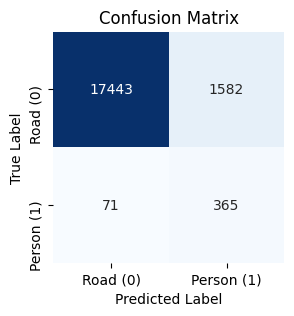

In [138]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Road (0)', 'Person (1)'],
            yticklabels=['Road (0)', 'Person (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### Accuracy Score

In [139]:
# Calculate and print the accuracy on the validation set
accuracy_val = accuracy_score(y_check, y_pred)
print(f"Model Accuracy on New Data: {accuracy_val:.2%}")

Model Accuracy on New Data: 91.51%


In [152]:
df_combined = pd.concat([df_feature_with_label, pd.Series(y_pred)], axis=1)
df_combined.rename(columns={0 :"label_pred",}, inplace=True)
df_combined.columns

Index(['surface_variation', 'planarity', 'sphericity', 'label', 'label_pred'], dtype='object')

In [153]:
df_combined

,surface_variation,planarity,sphericity,label,label_pred
0,0.001107,0.304310,0.000876,0.0,1
1,0.001107,0.304310,0.000876,0.0,1
2,0.001107,0.304310,0.000876,0.0,1
3,0.001107,0.304310,0.000876,0.0,1
4,0.001107,0.304310,0.000876,0.0,1
...,...,...,...,...,...
19456,0.049855,0.255797,0.038539,0.0,1
19457,0.046449,0.299899,0.037082,0.0,1
19458,0.042796,0.295262,0.034017,0.0,1
19459,0.038807,0.335232,0.031728,0.0,1


In [ ]:
# doesnot makes sense to save features csv

In [161]:
df_combined_xyz_features_label = pd.concat([df_combined, df_person_and_road.iloc[:,:3]], axis=1)

In [162]:
df_combined_xyz_features_label

,surface_variation,planarity,sphericity,label,label_pred,//X,Y,Z
0,0.001107,0.304310,0.000876,0.0,1,13.244883,-30.487314,-2.298460
1,0.001107,0.304310,0.000876,0.0,1,13.058827,-30.567465,-2.298460
2,0.001107,0.304310,0.000876,0.0,1,12.872343,-30.646477,-2.298460
3,0.001107,0.304310,0.000876,0.0,1,12.685312,-30.724356,-2.298460
4,0.001107,0.304310,0.000876,0.0,1,12.497812,-30.801088,-2.298460
...,...,...,...,...,...,...,...,...
19456,0.049855,0.255797,0.038539,0.0,1,6.670547,-2.300796,-2.349909
19457,0.046449,0.299899,0.037082,0.0,1,6.654882,-2.340845,-2.349350
19458,0.042796,0.295262,0.034017,0.0,1,6.639102,-2.380889,-2.348879
19459,0.038807,0.335232,0.031728,0.0,1,6.623398,-2.420908,-2.348494


In [163]:
df_combined_xyz_features_label.to_csv("csv/model_prediction.csv", index=False)